In [ ]:
!wget -c http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

--2023-10-09 07:25:14--  http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.58.104, 52.216.8.221, 52.216.107.94, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.58.104|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
import numpy as np
import random
import os
import matplotlib

In [ ]:
from tensorflow.keras import layers
image_in = layers.Input(shape=(150,150,3))

In [ ]:
x = layers.Conv2D(16, 3, activation='relu')(image_in)
x = layers.MaxPooling2D(2)(x)

In [ ]:
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
x = layers.Flatten()(x)
x = layers.Dense(512,activation='relu')(x)

In [ ]:
output = layers.Dense(1,activation='sigmoid')(x)

In [ ]:
from tensorflow.keras.models import Model
my_model= Model(image_in,output)

In [ ]:
from tensorflow.keras.optimizers import SGD
my_model.compile(loss='binary_crossentropy',optimizer=SGD(0.001),metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_data = ImageDataGenerator(rescale=1./255)

In [ ]:
import os
import zipfile
import requests
from tensorflow.keras.preprocessing.image import ImageDataGenerator

url = "http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip"


response = requests.get(url)


with open('Cat_Dog_data.zip', 'wb') as file:
    file.write(response.content)


with zipfile.ZipFile('Cat_Dog_data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

train_dir = 'data/Cat_Dog_data/train'

training_dataset = training_data.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 22500 images belonging to 2 classes.


In [ ]:

testing_dir = 'data/Cat_Dog_data/test'

validation_dataset = training_data.flow_from_directory(testing_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2500 images belonging to 2 classes.


In [ ]:
H = my_model.fit_generator(training_dataset, steps_per_epoch=100, epochs=30,validation_data=validation_dataset, validation_steps=50, verbose=2)

<ipython-input-24-dc5fdd7b0e58>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = my_model.fit_generator(training_dataset, steps_per_epoch=100, epochs=30,validation_data=validation_dataset, validation_steps=50, verbose=2)


Epoch 1/30
100/100 - 56s - loss: 0.6909 - acc: 0.5390 - val_loss: 0.6884 - val_acc: 0.5410 - 56s/epoch - 560ms/step
Epoch 2/30
100/100 - 53s - loss: 0.6881 - acc: 0.5455 - val_loss: 0.6880 - val_acc: 0.5720 - 53s/epoch - 530ms/step
Epoch 3/30
100/100 - 53s - loss: 0.6884 - acc: 0.5600 - val_loss: 0.6872 - val_acc: 0.5780 - 53s/epoch - 532ms/step
Epoch 4/30
100/100 - 53s - loss: 0.6860 - acc: 0.5565 - val_loss: 0.6867 - val_acc: 0.5490 - 53s/epoch - 525ms/step
Epoch 5/30
100/100 - 52s - loss: 0.6849 - acc: 0.5805 - val_loss: 0.6849 - val_acc: 0.5310 - 52s/epoch - 523ms/step
Epoch 6/30
100/100 - 52s - loss: 0.6823 - acc: 0.5620 - val_loss: 0.6794 - val_acc: 0.5810 - 52s/epoch - 524ms/step
Epoch 7/30
100/100 - 53s - loss: 0.6829 - acc: 0.5665 - val_loss: 0.6839 - val_acc: 0.5750 - 53s/epoch - 526ms/step
Epoch 8/30
100/100 - 59s - loss: 0.6780 - acc: 0.5855 - val_loss: 0.6787 - val_acc: 0.5980 - 59s/epoch - 588ms/step
Epoch 9/30
100/100 - 52s - loss: 0.6796 - acc: 0.5870 - val_loss: 0.6822

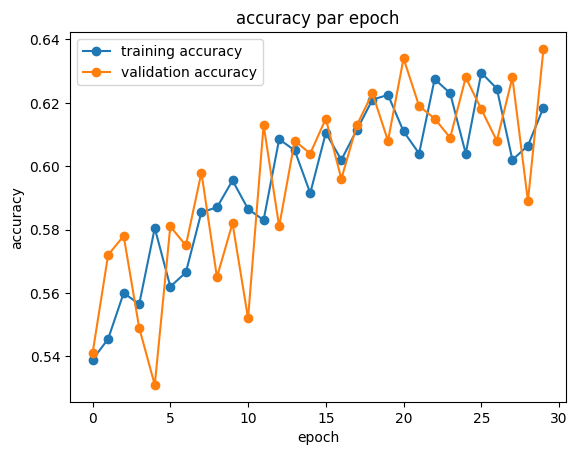

In [ ]:
import matplotlib.pyplot as plt


plt.plot(H.history['acc'], label='training accuracy', marker='o')
plt.plot(H.history['val_acc'], label='validation accuracy', marker='o')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy par epoch')
plt.legend()

plt.show()


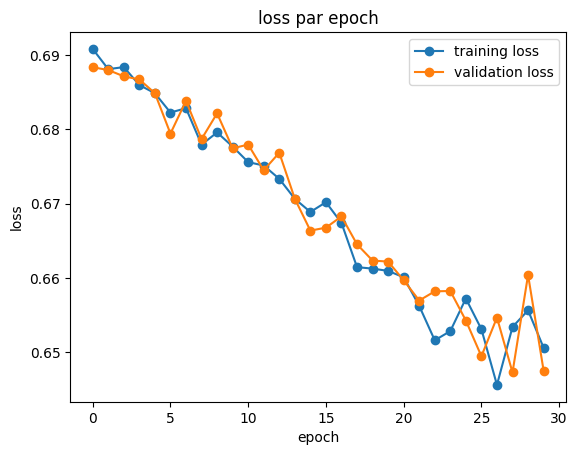

In [ ]:
plt.plot(H.history['loss'], label='training loss', marker='o')
plt.plot(H.history['val_loss'], label='validation loss', marker='o')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss par epoch')
plt.legend()

plt.show()


In [ ]:
predictions = my_model.predict(validation_dataset)
binary_predictions = (predictions > 0.5).astype(int)
cats= sum(binary_predictions == 0)
dogs= sum(binary_predictions == 1)
print("Nombre de chats : " + str(cats) + "Nombre de chiens : " + str(dogs))

125/125 [==============================] - 17s 137ms/step
Nombre de chats : [1044]Nombre de chiens : [1456]


In [ ]:
predictions = my_model.predict(validation_dataset)
binary_predictions = (predictions > 0.8).astype(int)
cats= sum(binary_predictions == 0)
dogs= sum(binary_predictions == 1)
print("Nombre de chats : " + str(cats) + "Nombre de chiens : " + str(dogs))

125/125 [==============================] - 17s 136ms/step
Nombre de chats : [2478]Nombre de chiens : [22]
